In [1]:
import os
import csv
import lightkurve as lk
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import astropy.units as u
import sys, string, calendar, datetime, traceback
import numpy as np


In [2]:
#path_to_csv_file = input('Please type path to csv file: \n')
f=open('/Users/AllieMcCarthy/Desktop/K2dataNew.csv')
csv_f=csv.reader(f)
header=next(csv_f)

In [3]:
#Need to create a list maybe to read from with all EPICs, maybe read from file? Prompt user?

J_mags_mdwarf=[]
JminusK_mags_mdwarf=[]
J_mags_ldwarf=[]
JminusK_mags_ldwarf=[]
J_mags_tdwarf=[]
JminusK_mags_tdwarf=[]
spec_types_original=[]
variable=[]
notvariable=[]


In [4]:
for row in csv_f:
  try:
     print(row)
     EPIC = int(row[0])
     ob_name = row[1]
     campaign_num = int(row[2])
     spec_type_original = str(row[5])
     spec_types_original.append(spec_type_original)
     J_mag = float(row[7])
     K_mag = float(row[9])
     J_mag_abs = float(row[12])
     if spec_type_original == 'M9' or spec_type_original == 'M8' or spec_type_original == 'M7' or spec_type_original == 'M6' or spec_type_original == 'M5' or spec_type_original == 'M4' or spec_type_original == 'M3' or spec_type_original == 'M2' or spec_type_original == 'M1' or spec_type_original == 'M0':
        J_mags_mdwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_mdwarf.append(JminusK)
     elif spec_type_original == 'L9' or spec_type_original == 'L8' or spec_type_original == 'L7' or spec_type_original == 'L6' or spec_type_original == 'L5' or spec_type_original == 'L4' or spec_type_original == 'L3' or spec_type_original == 'L2' or spec_type_original == 'L1' or spec_type_original == 'L0':
        J_mags_ldwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_ldwarf.append(JminusK)
     elif spec_type_original == 'T0':
        J_mags_tdwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_tdwarf.append(JminusK)
     

  except:
     pass
     print ('i had a problem')

['212178513\tSDSS0831+23\t5\t127.899756\t23.697451\tM7\tNo\t13.729\t13.152\t12.805\t2.15E-02\t4.64E+01\t10.39603483']
i had a problem
['212178513\tSDSS0831+23\t18\t127.899756\t23.697451\tM7\tNo\t13.729\t13.152\t12.805\t2.15E-02\t4.64E+01\t10.39603483']
i had a problem
['211332457\t2M0835+10\t5\t128.848607\t10.492178\tM8\tNo\t13.137\t12.49\t12.045\t3.69E-02\t2.71E+01\t10.97179049']
i had a problem
['211332457\t2M0835+10\t18\t128.848607\t10.492178\tM8\tNo\t13.137\t12.49\t12.045\t3.69E-02\t2.71E+01\t10.97179049']
i had a problem
['211329075\t2M0831+10\t5\t127.983268\t10.428261\tM9\tNo\t13.621\t12.963\t12.45\t3.16E-02\t3.17E+01\t11.1168845']
i had a problem
['211329075\t2M0831+10\t18\t127.983268\t10.428261\tM9\tNo\t13.621\t12.963\t12.45\t3.16E-02\t3.17E+01\t11.1168845']
i had a problem
['211962038\t2M0826+19\t5\t126.677623\t19.656242\tM9\tYes\t14.777\t14.009\t13.581\t2.37E-02\t4.21E+01\t11.6536351']
i had a problem
['211962038\t2M0826+19\t18\t126.677623\t19.656242\tM9\tYes\t14.777\t14.009\

In [5]:
#path_to_csv_file = input('Please type path to csv file: \n')
file=open('/Users/AllieMcCarthy/Desktop/ExtraData.csv')
csv_file=csv.reader(file)
next(csv_file)
next(csv_file)
next(csv_file)

['(SIMBADable)',
 'deg',
 'deg',
 'Ref.',
 'num',
 '',
 'Ref.',
 'Inst',
 'Ref',
 'mas',
 'mas',
 'mas yr-1',
 'mas yr-1',
 'deg',
 'deg',
 '',
 'deg',
 'deg',
 'UT',
 'JD',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 '',
 '',
 '',
 '',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'str',
 'num',
 '',
 '',
 '',
 'str',
 'num',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'sep. (")',
 'mas yr-1',
 'mas yr-1',
 'mas yr-1',
 'mas yr-1',
 '']

In [6]:
Jm_extra_data=[]
Jl_extra_data=[]
Jt_extra_data=[]
Jy_extra_data=[]
JminusK_mags_Mextradata=[]
spec_type_Mextradata=[]
spec_type_Lextradata=[]
spec_type_Textradata=[]
spec_type_Yextradata=[]
JminusK_mags_Lextradata=[]
JminusK_mags_Textradata=[]
JminusY_mags_Yextradata=[]

In [7]:
for row in csv_file:
  try:
     #print(row)
     spec_type_extra_data=float(row[4])
     J_mag_extra_data = float(row[20])
     K_mag_extra_data = float(row[26])
     JminusK_extra_data=J_mag_extra_data-K_mag_extra_data
     print('Im here')
     if spec_type_extra_data>0 and spec_type_extra_data<10:
        Jm_extra_data.append(J_mag_extra_data)
        spec_type_Mextradata.append(spec_type_extra_data)
        JminusK_mags_Mextradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=10 and spec_type_extra_data<20:
        Jl_extra_data.append(J_mag_extra_data)
        spec_type_Lextradata.append(spec_type_extra_data)
        JminusK_mags_Lextradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=20 and spec_type_extra_data<30:
        Jt_extra_data.append(J_mag_extra_data)
        spec_type_Textradata.append(spec_type_extra_data)
        JminusK_mags_Textradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=30 and spec_type_extra_data<40:
        Jy_extra_data.append(J_mag_extra_data)
        spec_type_Yextradata.append(spec_type_extra_data)
        JminusY_mags_Yextradata.append(JminusK_extra_data)
     

  except:
     pass
     print ('i had a problem')
print(Jm_extra_data)
print(Jl_extra_data)
print(Jt_extra_data)
print(Jy_extra_data)

Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here


<function matplotlib.pyplot.show(*args, **kw)>

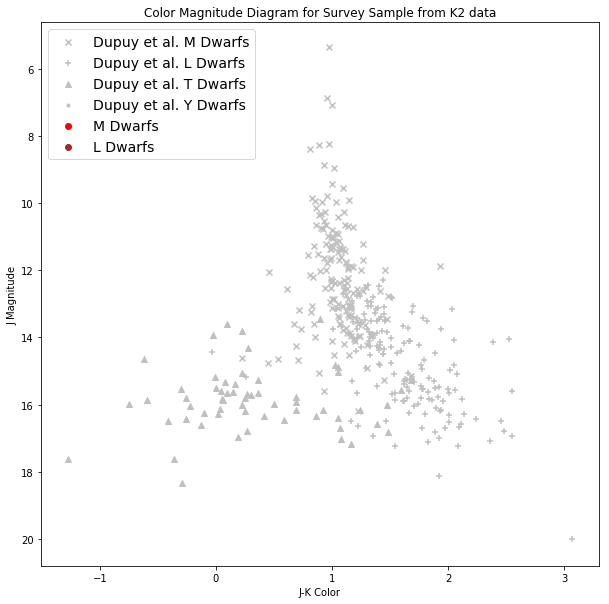

In [8]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(JminusK_mags_Mextradata,Jm_extra_data,color='#C0C0C0', label='Dupuy et al. M Dwarfs', marker='x')
ax1.scatter(JminusK_mags_Lextradata,Jl_extra_data,color='#C0C0C0', label='Dupuy et al. L Dwarfs', marker='+')
ax1.scatter(JminusK_mags_Textradata,Jt_extra_data,color='#C0C0C0', label='Dupuy et al. T Dwarfs', marker='^')
ax1.scatter(JminusY_mags_Yextradata,Jy_extra_data,color='#C0C0C0', label='Dupuy et al. Y Dwarfs', marker='.')
ax1.scatter(JminusK_mags_mdwarf,J_mags_mdwarf,color='red', label='M Dwarfs')
ax1.scatter(JminusK_mags_ldwarf,J_mags_ldwarf,color='brown', label='L Dwarfs')
#ax1.scatter(JminusK_mags_tdwarf,J_mags_tdwarf,color='orange', label='T Dwarfs')
ax1.yaxis.label.set_color('black')
ax1.xaxis.label.set_color('black')
ax1.title.set_color('black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

plt.title('Color Magnitude Diagram for Survey Sample from K2 data')
plt.xlabel('J-K Color')
plt.ylabel('J Magnitude')
plt.gca().invert_yaxis()
plt.legend(loc='upper left',prop={'size': 14})
plt.show

In [9]:
#path_to_csv_file = input('Please type path to csv file: \n')
spec_type_file=open('/Users/AllieMcCarthy/Desktop/K2dataSpecTypesNumbers.csv')
csv_spec_type_file=csv.reader(spec_type_file)
header=next(csv_spec_type_file)

In [10]:
spec_types=[]
JminK_vals=[]
oldEpic=0
for row in csv_spec_type_file:
#  try:
     EPIC=int(row[0])
     if oldEpic!=EPIC:
        spec_type = float(row[5])
        spec_types.append(spec_type)
        J_mag=float(row[7])
        K_mag=float(row[9])
        JminusK=J_mag-K_mag
        JminK_vals.append(JminusK)
        oldEpic=EPIC
        
#  except:
#     pass
#     print ('i had a problem')

print(spec_types)
len(spec_types)

[7.0, 7.9, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.9, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.7, 12.9, 13.0, 13.0, 13.0, 14.5, 15.0, 17.5, 19.5]


27

[ 3  6  9 12 15 18 21 24 27 30]


<function matplotlib.pyplot.show(*args, **kw)>

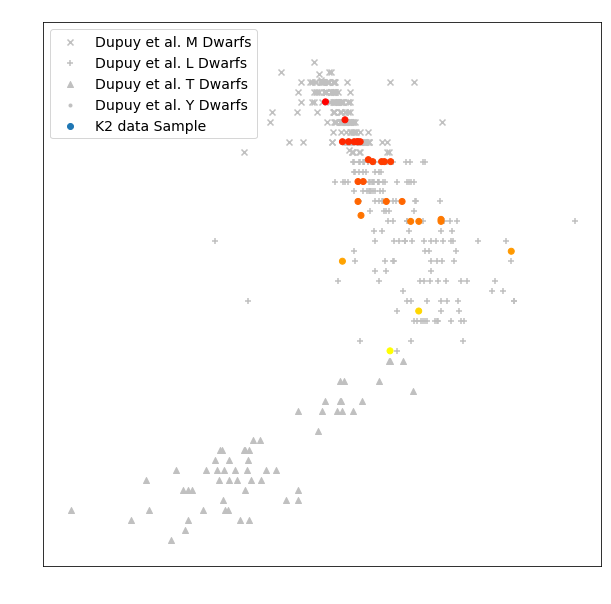

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(JminusK_mags_Mextradata,spec_type_Mextradata,color='#C0C0C0', label='Dupuy et al. M Dwarfs', marker='x')
ax1.scatter(JminusK_mags_Lextradata,spec_type_Lextradata,color='#C0C0C0', label='Dupuy et al. L Dwarfs', marker='+')
ax1.scatter(JminusK_mags_Textradata,spec_type_Textradata,color='#C0C0C0', label='Dupuy et al. T Dwarfs', marker='^')
ax1.scatter(JminusY_mags_Yextradata,spec_type_Yextradata,color='#C0C0C0', label='Dupuy et al. Y Dwarfs', marker='.')
ax1.scatter(JminK_vals,spec_types,c=spec_types, cmap='autumn',label='K2 data Sample')

y_spec_types=np.arange(3,33,3)
print(y_spec_types)
my_yticks = ['M3','M6','M9','L2','L5','L8','T1','T4','T7','Y0']
plt.yticks(y_spec_types, my_yticks)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Color Magnitude Diagram for Survey Sample from K2 data')
plt.xlabel('J-K Color')
plt.ylabel('Spectral Type')
plt.gca().invert_yaxis()
plt.legend(loc='upper left',prop={'size': 14})
plt.show

In [12]:
import pandas
from collections import Counter
#spec_types_original.sort()
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
letter_counts = Counter(spec_types_original)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
ax=df.plot(kind='bar', legend=False, figsize=(10,8))
ax.set_xlabel('Spectral Type')
ax.set_ylabel('Number')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_ylim(0,16)

ax.set_title('Spectral Type Distribution in my K2 Data Sample')


TypeError: Empty 'DataFrame': no numeric data to plot

[ 7  8  9 10 11 12 13 14 15 16 17 18 19]


<function matplotlib.pyplot.show(*args, **kw)>

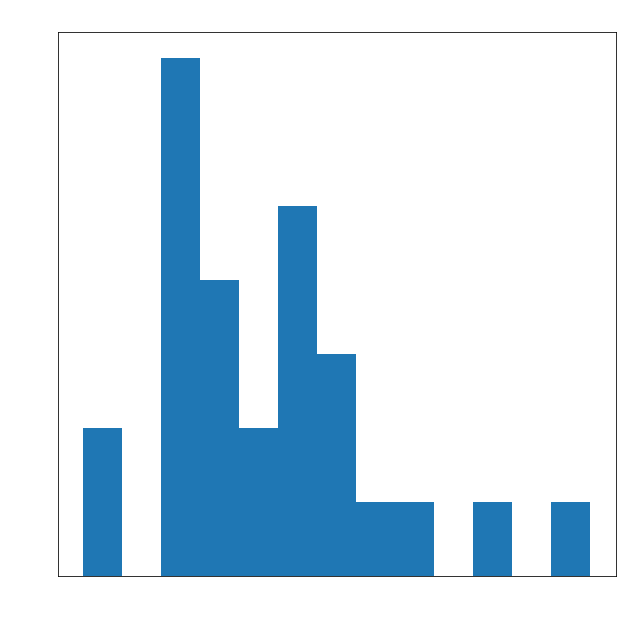

In [18]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
np.histogram(spec_types,bins=13,range=(7,20))
ax1.hist(spec_types,bins=13,range=(7,20))
x_spec_types=np.arange(7,20,1)
print(x_spec_types)
my_xticks = ['M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9']
plt.xticks(x_spec_types, my_xticks,fontsize=24)
plt.yticks(fontsize=24)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Spectral Type Distribution from K2 data',fontsize=24)
plt.xlabel('Spectral Type',fontsize=24)
plt.ylabel('Number',fontsize=24)
plt.show



Text(0.5,1,'Spectral Type Distribution in my K2 Data Sample')

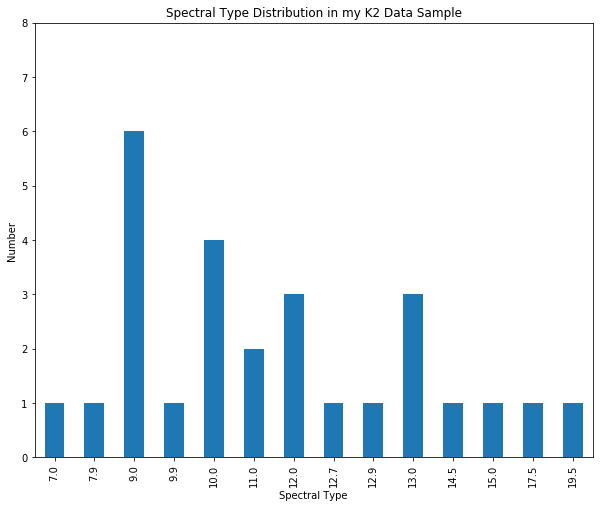

In [14]:
import pandas
from collections import Counter
#spec_types_original.sort()
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
spec_types.sort()
letter_counts = Counter(spec_types)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
ax=df.plot(kind='bar', legend=False, figsize=(10,8))
ax.set_xlabel('Spectral Type')
ax.set_ylabel('Number')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_ylim(0,8)

ax.set_title('Spectral Type Distribution in my K2 Data Sample')
